In [61]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math

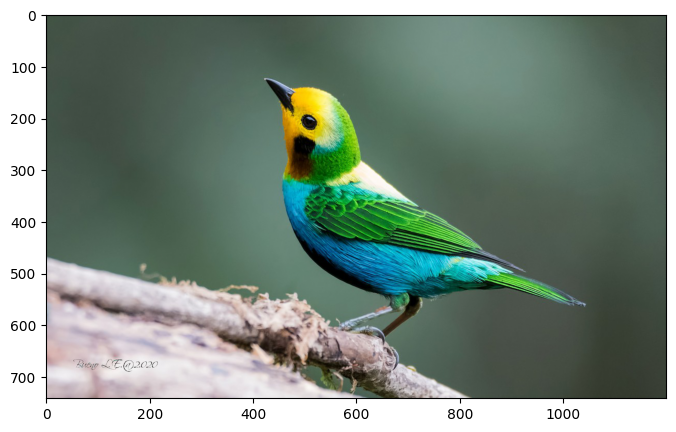

In [62]:
#read image
img = np.asarray(Image.open('bird.jpeg'))
img = img/255

figure(figsize = (8, 6), dpi = 100)
plt.imshow(img)
plt.show()

In [63]:
#return estimated focus score
def getHighFreqScore(img):
    
    fr = np.fft.fft2(img[:, :, 0])
    fg = np.fft.fft2(img[:, :, 1])
    fb = np.fft.fft2(img[:, :, 2])
    
    #get coefficient magnitude
    magR = (fr.real**2 + fr.imag**2) ** 0.5
    magG = (fg.real**2 + fg.imag**2) ** 0.5
    magB = (fb.real**2 + fb.imag**2) ** 0.5
    
    #get acceleration on x and y axises
    def getAcceleration(img):
        
        aX = img[:, 1 : ] - img[:, 0 : -1]
        aX = aX[:, 1 : ] - aX[:, 0 : -1]
        aY = img[1 : , :] - img[0 : -1, :]
        aY = aY[1 :, :] - aY[0 : -1, :]
        
        #get acceleration magnitude
        mag = (aX[0 : -2, :]**2 + aY[:, 0 : -2]**2) ** 0.5
        return np.sum(mag)
    
    return getAcceleration(magR) + getAcceleration(magG) + getAcceleration(magB)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


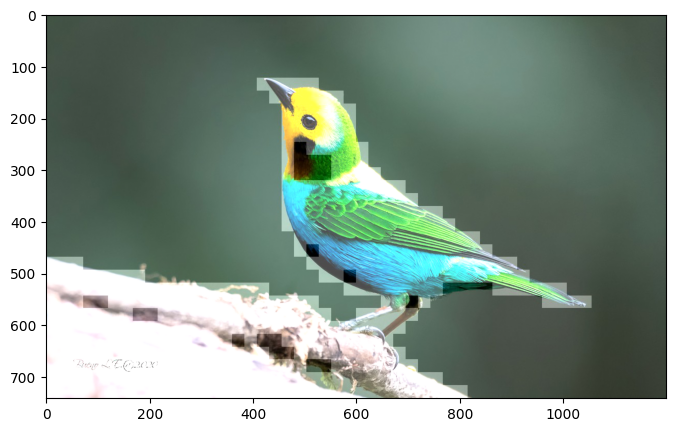

In [64]:
resolution = (30, 50)
deltaY = img.shape[0]/resolution[0]
deltaX = img.shape[1]/resolution[1]
threshold = 2000

for y in range(0, resolution[0]):
    for x in range(0, resolution[1]):
        x0 = math.floor(x * deltaX)
        x1 = math.floor((x + 1) * deltaX)
        y0 = math.floor(y * deltaY)
        y1 = math.floor((y + 1) * deltaY)
        val = getHighFreqScore(img[y0 : y1, x0 : x1, :])
        if val > threshold:
            img[y0 : y1, x0 : x1, :] += 0.3

figure(figsize = (8, 6), dpi = 100)
plt.imshow(img)
plt.show()    